In [5]:
from tensorflow.keras.datasets.fashion_mnist import load_data

In [9]:
(x_train, y_train),(x_test, y_test) = load_data()

In [10]:
print(f"{x_train.shape}, {y_train.shape}")
print(f"{x_test.shape}, {y_test.shape}")

(60000, 28, 28), (60000,)
(10000, 28, 28), (10000,)


In [11]:
import matplotlib.pyplot as plt

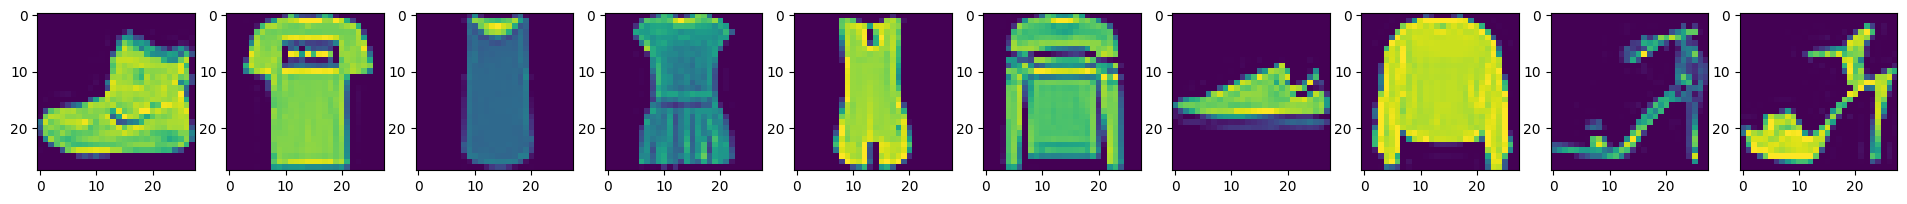

In [14]:
fig, axes = plt.subplots(figsize =(24, 10), nrows=1, ncols=10)

for i in range(10):
    img = x_train[i]
    axes[i].imshow(img)

label

0 : T-shirt / top

1 : Trouser

2 : Pullover

3 : Dress

4 : Coat

5 : Sandal

6 : Shirt

7 : Sneaker

8 : Bag

9 : Ankle boot

In [15]:
import numpy as np

In [16]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [19]:
x_train_scale = (x_train / 255.0).reshape(60000, 28 * 28)
x_test_scale = (x_test / 255.0).reshape(10000, 28 * 28)

In [ ]:
# 다차원을 표현하기 힘들기 때문에 2차원으로 변경
print(x_train_scale.shape)
print(x_test_scale.shape)

(60000, 784)
(10000, 784)


In [21]:
from tensorflow.keras.utils import to_categorical

In [22]:
y_train_cate = to_categorical(y_train)
y_test_cate = to_categorical(y_test)

In [ ]:
# 컴퓨터가 알아보기 쉽도록 0 또는 1로 표현
print(y_train_cate[0])
print(y_test_cate[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [25]:
model = Sequential()

In [ ]:
# 인풋 레이어
model.add(Dense(32, input_shape=(784, ), activation="relu"))

# 히든 레이어
model.add(Dense(64, activation="relu"))

# 다중분류, 아웃풋 레이어
model.add(Dense(10, activation="softmax"))

/Users/handaeseong/dev/data-engineer/miniconda3/envs/multi02_tensor/lib/python3.9/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["acc"])

In [29]:
result = model.fit(x_train_scale, y_train_cate, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 577us/step - acc: 0.7464 - loss: 0.7390
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 579us/step - acc: 0.8561 - loss: 0.4034
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 646us/step - acc: 0.8681 - loss: 0.3615
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 574us/step - acc: 0.8761 - loss: 0.3414
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 570us/step - acc: 0.8809 - loss: 0.3258
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 605us/step - acc: 0.8830 - loss: 0.3160
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 566us/step - acc: 0.8898 - loss: 0.2989
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 575us/step - acc: 0.8903 - loss: 0.2959
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 637us/step - acc: 0.8916 - loss: 0.2892
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 598us/step - acc: 0.8954 - loss: 0.2790


In [ ]:
# 학습 
model.evaluate(x_test_scale, y_test_cate)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step - acc: 0.8795 - loss: 0.3452


[0.34989869594573975, 0.8769000172615051]

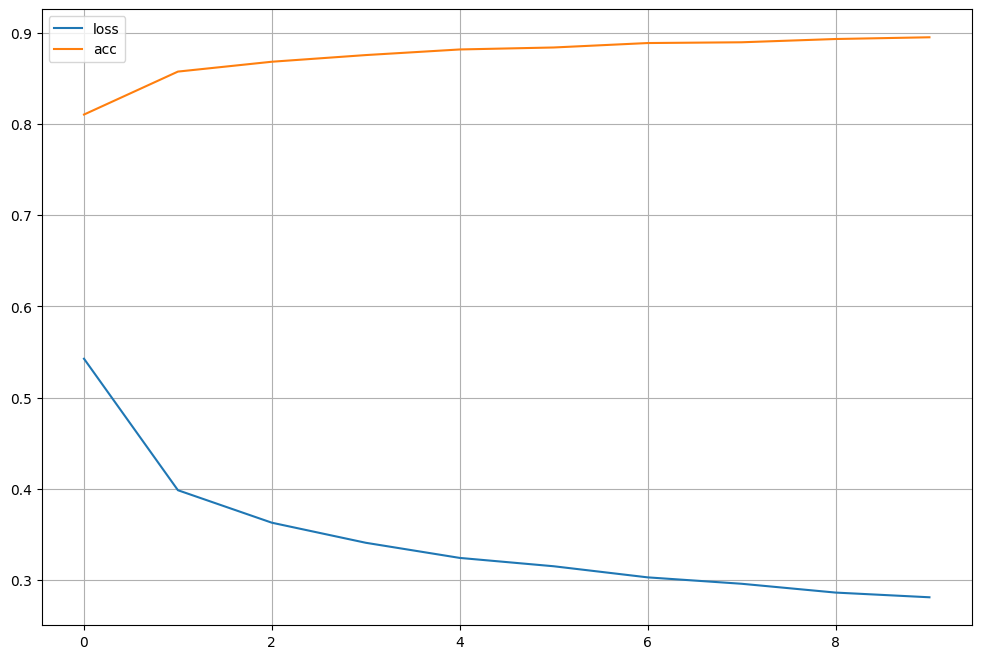

In [31]:
names = ["loss", "acc"]

plt.figure(figsize=(12, 8))

for name in names:
    plt.plot(result.history[name], label=name)

plt.legend()
plt.grid()
plt.show()

In [32]:
# 예측
predict = model.predict(x_test_scale)

predict_labels = np.argmax(predict, axis=1)
y_test_labels =  np.argmax(y_test_cate, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step


In [ ]:
# 모두 맞게 나오는 것 같아.
print(predict_labels)
print(y_test_labels)

[9 2 1 ... 8 1 5]
[9 2 1 ... 8 1 5]


In [ ]:
# 뭐가 일치 하지 않았는지 알고 싶다.
# 다를 때 인덱스값을 수집했다.
# 총 :1231개 틀렸음

wrong_list = []
for i in range(0, len(y_test)):
    if predict_labels[i] != y_test_labels[i]:
        wrong_list.append(i)

print(wrong_list)
print(len(wrong_list))

[17, 23, 25, 40, 42, 49, 51, 66, 68, 89, 103, 135, 136, 141, 147, 150, 153, 183, 221, 239, 241, 244, 247, 255, 269, 271, 283, 285, 289, 316, 320, 324, 325, 332, 354, 359, 361, 374, 378, 381, 382, 396, 404, 406, 407, 409, 441, 444, 452, 454, 457, 460, 474, 490, 511, 526, 529, 562, 563, 572, 586, 589, 594, 595, 607, 628, 634, 635, 639, 663, 664, 669, 670, 681, 685, 688, 689, 702, 711, 722, 725, 732, 747, 753, 760, 761, 787, 800, 801, 823, 830, 851, 860, 881, 887, 888, 890, 902, 905, 909, 921, 926, 930, 933, 935, 937, 938, 956, 963, 965, 966, 967, 971, 976, 977, 979, 985, 994, 1000, 1004, 1005, 1025, 1029, 1051, 1055, 1058, 1064, 1082, 1104, 1111, 1121, 1129, 1131, 1139, 1152, 1160, 1162, 1165, 1174, 1192, 1207, 1210, 1218, 1223, 1231, 1249, 1254, 1294, 1297, 1300, 1305, 1326, 1329, 1336, 1339, 1343, 1356, 1374, 1388, 1396, 1399, 1408, 1425, 1431, 1449, 1450, 1455, 1458, 1462, 1471, 1482, 1487, 1496, 1501, 1504, 1509, 1513, 1522, 1527, 1533, 1539, 1585, 1587, 1596, 1620, 1624, 1632, 1643,

In [36]:
import random

In [38]:
samples = random.choices(population=wrong_list, k=16)
samples

[909,
 3132,
 7004,
 7334,
 7962,
 8292,
 6231,
 7583,
 8758,
 4708,
 9666,
 3598,
 4194,
 1297,
 247,
 5378]

In [39]:
labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

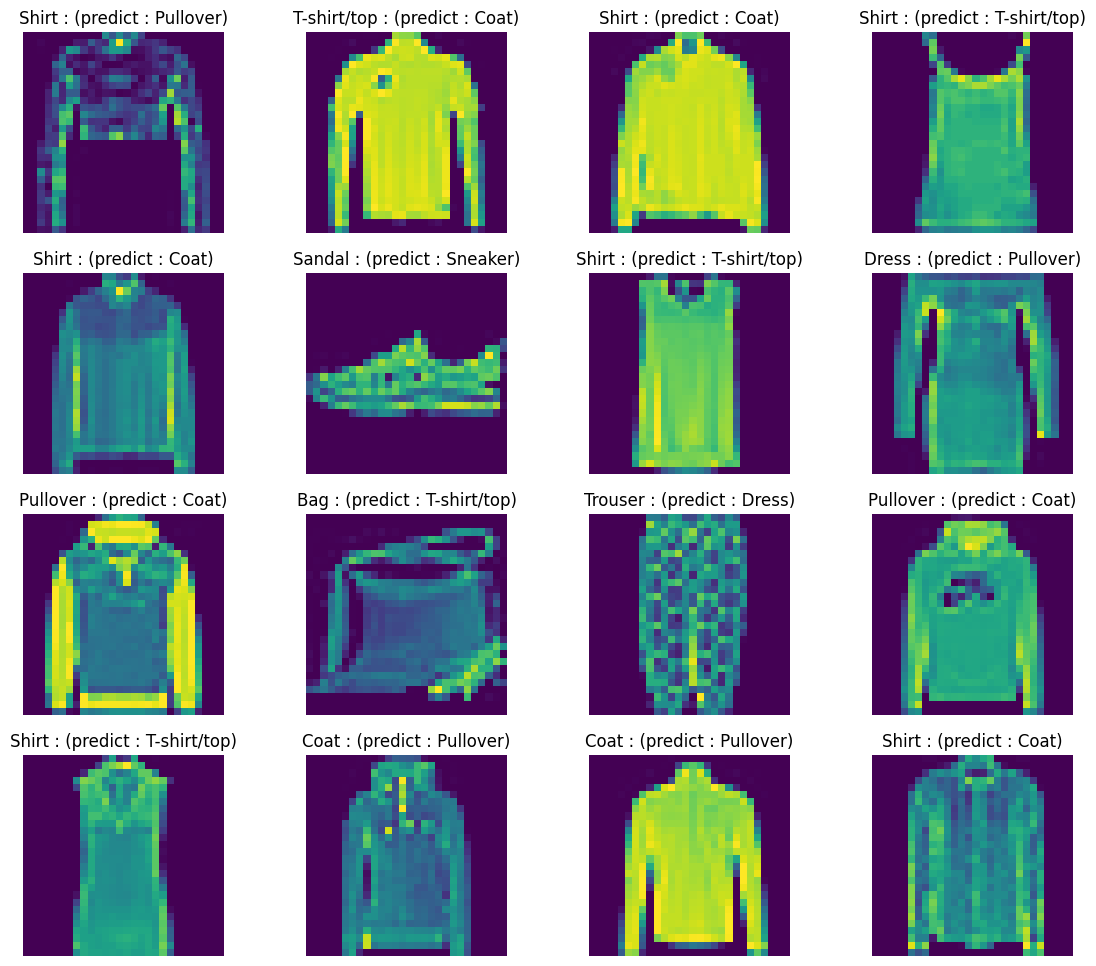

In [ ]:
# 틀린 것중 16개 뽑아서 출력해보자.
plt.figure(figsize=(14, 12))

for idx, sample in enumerate(samples):
    plt.subplot(4, 4, idx+1)

    plt.imshow(x_test[sample].reshape(28, 28))
    plt.title(f"{labels[y_test_labels[sample]]} : (predict : {labels[predict_labels[sample]]})")
    plt.axis("off")

plt.show()